### Домашнее задание 3

Рассмотрим краевую задачу для PDE
$$
(-\frac{\partial^2}{\partial x^2} - \frac{\partial^2}{\partial y^2} + e^{xy})u(x, y) = f(x, y)
$$

$0 \leq x, y \leq 1$, $u(0, y) = u(1, y) = u(x, 0) = u(x, 1) = 0$

Пусть $f$ выбрана такой, что
$
u_0(x, y) = \sin\pi x \sin 2\pi y
$ -- решение задачи.

<br><br>
Тогда $f$ имеет вид: $$f(x, y) = \sin \pi x \sin 2 \pi y (5\pi^2 + e^{xy})$$

In [11]:
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Аналитическое решение для $u$:

In [2]:
def analytical_solve(N, x, y):
    u = np.zeros(N ** 2)
    for i in range(N):
        for j in range(N):
            k = i + j * N
            u[k] = np.sin(np.pi * x[i]) * np.sin(2 * np.pi * y[j])

    return np.array(u)

Построение матрицы А для системы уравнений:

In [3]:
def matrix_A(N, x, y):
    h = 1 / (N + 1)
    
    rows = []
    cols = []
    data = []
    for i in range(N):
        for j in range(N):
            k = i + j * N
            
            rows.append(k)
            cols.append(k)
            data.append(4 / (h ** 2) + np.exp(x[i] * y[j]))
            
            if i >= 1:
                k_ = k - 1
                rows.append(k)
                cols.append(k_)
                data.append(- 1 / (h ** 2))
                
            if i <= N - 2:
                k_ = k + 1
                rows.append(k)
                cols.append(k_)
                data.append(- 1 / (h ** 2))
                
            if j >= 1:
                k_ = k - N
                rows.append(k)
                cols.append(k_)
                data.append(- 1 / (h ** 2))
            
            if j <= N - 2:
                k_ = k + N
                rows.append(k)
                cols.append(k_)
                data.append(- 1 / (h ** 2))
                        
    A = csr_matrix((data, (rows, cols)))
    
    return A

In [7]:
def SOR(N, max_iter=100, w=1.2, tol=1e-4):
    h = 1 / (N + 1)
    x = np.linspace(h, 1, num=N, endpoint=False)
    y = np.linspace(h, 1, num=N, endpoint=False)
    
    f = np.zeros(N ** 2)
    for i in range(N):
        for j in range(N):
            k = i + j * N
            f[k] = np.sin(np.pi * x[i]) * np.sin(2 * np.pi * y[j]) * (5 * np.pi ** 2 + np.exp(x[i] * y[j]))

    A = matrix_A(N, x, y)
    A = [r for r in A]
    true_solution = analytical_solve(N, x, y)
    u = np.zeros(N ** 2)
    
    err = np.array([])    
    
    for num_iter in range(max_iter):
        u_prev = u.copy()
        for i in range(N ** 2):
            u[i] = u[i] + w / A[i][0, i] * (f[i] - A[i] @ u)
            
        err = np.append(err, np.linalg.norm(u - true_solution, ord=np.inf))
        if np.linalg.norm(u - u_prev, ord=np.inf) <= tol:
            break
    return np.array(err, dtype=np.float64)

In [8]:
def plot(N = 10):
    fig, axs = plt.subplots(1,2, figsize=(16,5))
    for w in [1, 1.3, 1.6, 1.8, 1.9]:
        err = SOR(N, w=w)
        err_log = np.log(SOR(N, w=w))
        axs[0].plot(err, label=f'w = {w}', linewidth=2.2)
        axs[1].plot(err_log, label=f'w = {w}', linewidth=2.2)

    axs[0].set(xlabel='Номер итерации')
    axs[0].set(ylabel="Погрешность")
    axs[0].set(title=f'Погрешность при N = {N}')
    axs[0].legend(facecolor='white', fontsize=12)

    axs[1].set(xlabel='Номер итерации')
    axs[1].set(title=f'Логарифм погрешности при N = {N}')
    axs[1].set(ylabel="Логарифм погрешности")
    axs[1].legend(facecolor='white', fontsize=12)
    plt.show()

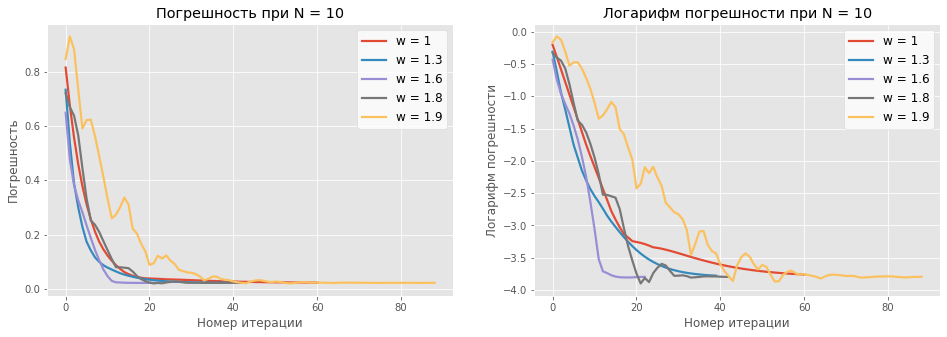

Wall time: 2.07 s


In [9]:
%%time
plot(N=10)

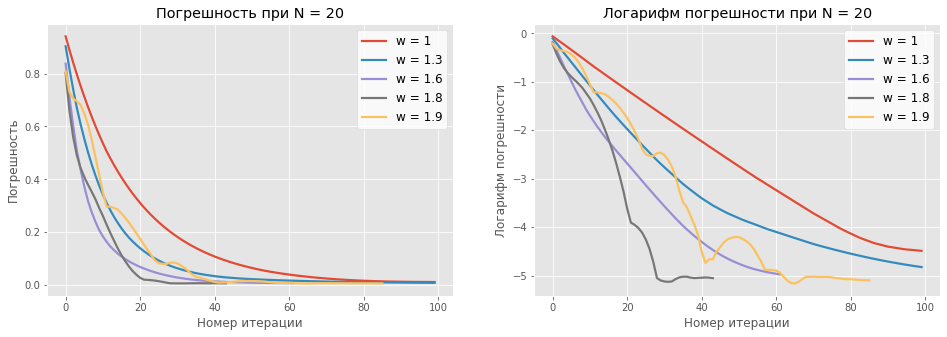

Wall time: 11.5 s


In [10]:
%%time
plot(N=20)

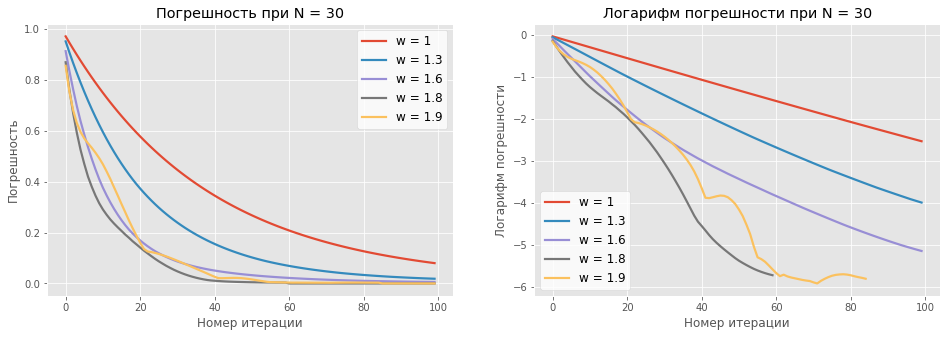

Wall time: 36.5 s


In [14]:
%%time
plot(N=30)

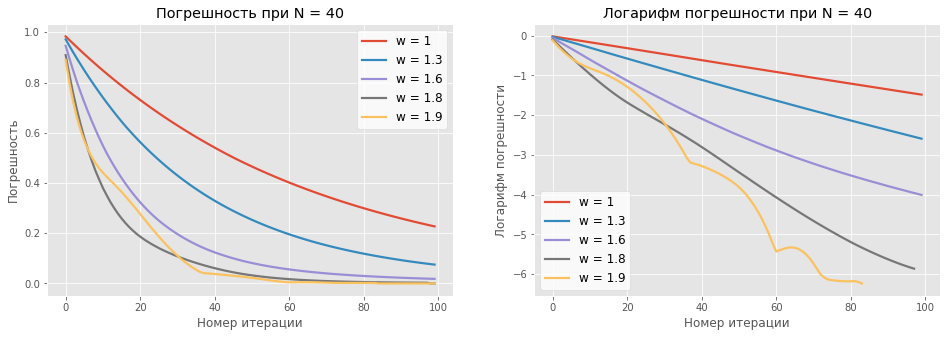

Wall time: 1min 17s


In [15]:
%%time
plot(N=40)

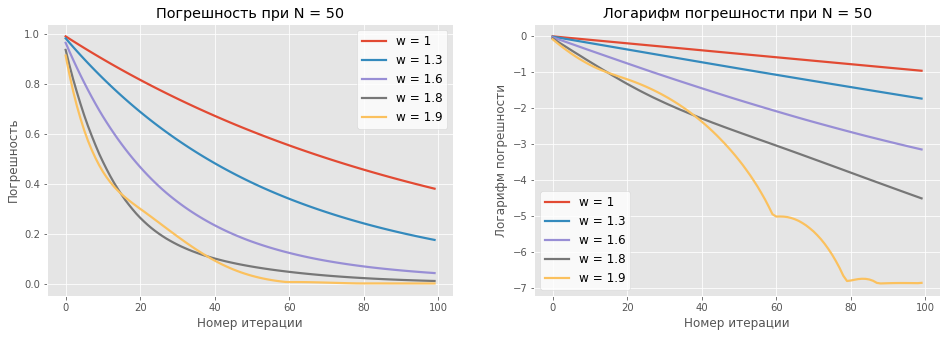

Wall time: 3min


In [12]:
%%time
plot(N=50)

Из графиков видно, что с ростом $N$ точность решения очевидно увеличивается. Также видно, что с ростом $N$ оптимальное омега (по числу итераций) постепенно растет. И для $N=50$ видим явно самую быструю сходимость при $w=1.9$.